In [2]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import hist
from hist import Hist

In [3]:
pred_pkls_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new/nominal'
pred_pkls_path = Path(pred_pkls_path)

In [4]:
pred_pkls_files = sorted(pred_pkls_path.rglob('pythia*_pred.pkl'))

In [5]:
sample = []
for pred_pkls_file in pred_pkls_files:
    sample_pd = joblib.load(pred_pkls_file)
    sample_pd = sample_pd[(sample_pd["jet_nTracks"] > 1) & (sample_pd["target"] != '-') & (sample_pd['event_weight'] < 50)] 

    sample.append(sample_pd.sample(frac = 0.3))

In [6]:
sample = pd.concat(sample)

In [ ]:
#sample.shape
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
3238411,364704.0,125988131.0,557.613403,-0.455438,14.0,0.014381,0.144946,-0.196504,3.0,2.0,0.098855,1.0,0.0,0,0,-1.729576,0.098855,0.098855,0.098855,0.098855
3455858,364706.0,26285773.0,1510.885986,-0.490748,33.0,0.036924,0.204487,0.208877,2.0,2.0,0.015172,0.0,1.0,5,0,0.416297,0.016162,0.015209,0.016798,0.015552
6150249,364705.0,32728534.0,900.009583,0.637667,6.0,0.009031,0.108667,-0.554250,2.0,2.0,0.031934,0.0,0.0,2,0,-3.978440,0.026166,0.026596,0.031298,0.032372
3329447,364705.0,71931988.0,825.474121,0.666918,26.0,0.052535,0.245859,0.195831,1.0,2.0,0.046829,1.0,0.0,2,0,0.728364,0.046829,0.046829,0.046829,0.046829
1919617,364704.0,103239477.0,524.123230,-0.756148,31.0,0.074126,0.268501,0.334522,21.0,2.0,0.270055,0.0,0.0,0,1,1.916185,0.330709,0.291766,0.350503,0.295033


In [7]:
sample_1 = sample[sample.columns[:15]]

In [8]:
sample_1.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target
3238411,364704.0,125988131.0,557.613403,-0.455438,14.0,0.014381,0.144946,-0.196504,3.0,2.0,0.098855,1.0,0.0,0,0
3455858,364706.0,26285773.0,1510.885986,-0.490748,33.0,0.036924,0.204487,0.208877,2.0,2.0,0.015172,0.0,1.0,5,0
6150249,364705.0,32728534.0,900.009583,0.637667,6.0,0.009031,0.108667,-0.554250,2.0,2.0,0.031934,0.0,0.0,2,0
3329447,364705.0,71931988.0,825.474121,0.666918,26.0,0.052535,0.245859,0.195831,1.0,2.0,0.046829,1.0,0.0,2,0
1919617,364704.0,103239477.0,524.123230,-0.756148,31.0,0.074126,0.268501,0.334522,21.0,2.0,0.270055,0.0,0.0,0,1


In [8]:
sample_g = sample_1[sample_1["target"] == 1]
sample_q = sample_1[sample_1["target"] == 0]

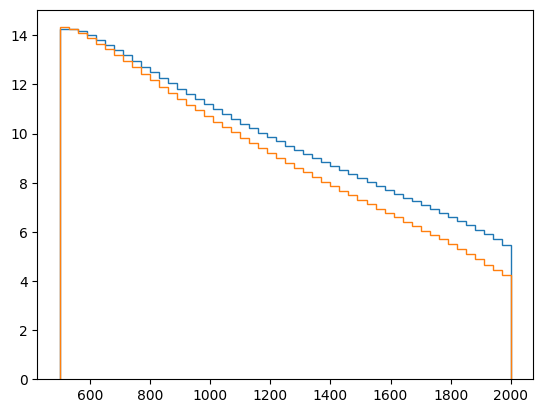

In [9]:
pt_hist =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist.fill(sample_q['jet_pt'], weight=sample_q['event_weight'])
plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,51))
#pt_hist.plot()
pt_hist_g =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_g.fill(sample_g['jet_pt'], weight=sample_g['event_weight'])
plt.stairs(np.log(pt_hist_g.values()), np.linspace(500,2000,51))

In [10]:
flatpt_factor = 1.0 / pt_hist.values()
flatpt_factor_g = 1.0 / pt_hist_g.values()

In [11]:
pt_idx = np.digitize(sample_q['jet_pt'], bins=np.linspace(500,2000,51)) - 1
pt_idx_g = np.digitize(sample_g['jet_pt'], bins=np.linspace(500,2000,51)) - 1

In [12]:
sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]

/tmp/ipykernel_120163/2679538622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
/tmp/ipykernel_120163/2679538622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f62878fb580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

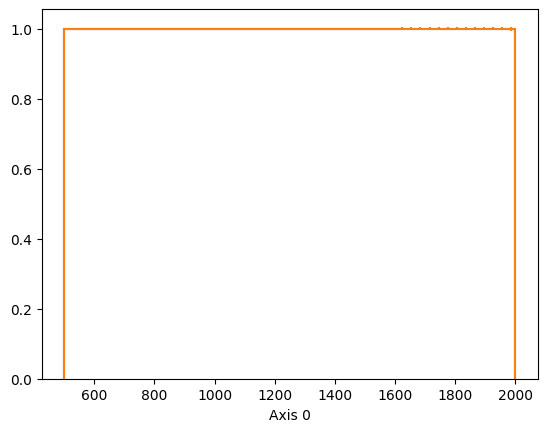

In [13]:
pt_hist_flat_pt =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt.fill(sample_q['jet_pt'], weight=sample_q['flatpt_weight'])
pt_hist_flat_pt.plot()

pt_hist_flat_pt_g =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt_g.fill(sample_g['jet_pt'], weight=sample_g['flatpt_weight'])
pt_hist_flat_pt_g.plot()

In [ ]:
sample_qg=[sample_q,sample_g]
sample_all = pd.concat(sample_qg)

In [ ]:
sample_all['target'] = sample_all['target'].astype(float)

In [16]:
sample_q.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,flatpt_weight
3238411,364704.0,125988131.0,557.613403,-0.455438,14.0,0.014381,0.144946,-0.196504,3.0,2.0,0.098855,1.0,0.0,0,0,2.492265e-07
3455858,364706.0,26285773.0,1510.885986,-0.490748,33.0,0.036924,0.204487,0.208877,2.0,2.0,0.015172,0.0,1.0,5,0,1.647423e-05
6150249,364705.0,32728534.0,900.009583,0.637667,6.0,0.009031,0.108667,-0.554250,2.0,2.0,0.031934,0.0,0.0,2,0,9.128982e-07
3329447,364705.0,71931988.0,825.474121,0.666918,26.0,0.052535,0.245859,0.195831,1.0,2.0,0.046829,1.0,0.0,2,0,6.821715e-07
261908,364704.0,309372077.0,734.820862,-1.906262,23.0,0.027613,0.190628,0.178136,2.0,2.0,0.162851,1.0,1.0,1,0,1.196111e-06


In [17]:
sample_all.to_pickle("training_sample_qg.pkl")

In [2]:
sample = pd.read_pickle('training_sample_qg.pkl')

In [18]:
# %%
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
import optuna
from optuna.samplers import TPESampler
import pickle
import pandas as pd 
import joblib
import os, sys 
sys.path.append('/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/BDT_EB4/LightGBM')
from LightGBM_BDT_train import *

/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
sample_all['target'] = sample_all['target'].astype(float)

In [30]:
training_vars = ['jet_pt', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1']
training_weight = ['flatpt_weight']

label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]

target_idx = sample_all.columns.get_loc('target')
y = sample_all.iloc[:, target_idx]
X = sample_all.drop(columns = 'target')

X_dev,X_test, y_dev,y_test = train_test_split(X, y, test_size=0.1, random_state=456)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1/0.9, random_state=789)


In [31]:
y_train

3563797    0.0
3077177    0.0
3480746    0.0
2140521    0.0
1348815    1.0
          ... 
3979805    0.0
2491139    0.0
2609743    0.0
165387     1.0
2139592    1.0
Name: target, Length: 36196182, dtype: float64

In [32]:
 
 
base_model = lgb.LGBMClassifier(random_state=42)
 #base_model.fit(X_train[training_vars], y_train, sample_weight=X_train[training_weight].to_numpy().flatten())

base_model.fit(X = X_train[training_vars], y = y_train, sample_weight=X_train[training_weight].to_numpy().flatten(),
               eval_set = [(X_val[training_vars], y_val)], eval_sample_weight = [X_val[training_weight].to_numpy().flatten()],
               eval_metric = ['binary_logloss', 'auc'])

[1]	valid_0's binary_logloss: 0.663151	valid_0's auc: 0.821312
[2]	valid_0's binary_logloss: 0.638609	valid_0's auc: 0.824372
[3]	valid_0's binary_logloss: 0.618339	valid_0's auc: 0.824967
[4]	valid_0's binary_logloss: 0.601435	valid_0's auc: 0.825532
[5]	valid_0's binary_logloss: 0.587168	valid_0's auc: 0.826249
[6]	valid_0's binary_logloss: 0.575134	valid_0's auc: 0.826932
[7]	valid_0's binary_logloss: 0.564992	valid_0's auc: 0.827248
[8]	valid_0's binary_logloss: 0.556376	valid_0's auc: 0.827557
[9]	valid_0's binary_logloss: 0.548994	valid_0's auc: 0.827902
[10]	valid_0's binary_logloss: 0.542704	valid_0's auc: 0.828176
[11]	valid_0's binary_logloss: 0.537282	valid_0's auc: 0.828468
[12]	valid_0's binary_logloss: 0.532673	valid_0's auc: 0.828695
[13]	valid_0's binary_logloss: 0.528778	valid_0's auc: 0.828814
[14]	valid_0's binary_logloss: 0.52531	valid_0's auc: 0.829092


KeyboardInterrupt: 